In [24]:
import pandas as pd
from matplotlib import pyplot as plt
from statistics import median

In [3]:
df = pd.read_pickle("../data/trials_topics_combined_all_years.pickle")
df.head()

,score,id,brief_summary,brief_title,minimum_age,gender,primary_outcome,detailed_description,keywords,official_title,...,condition_browse,inclusion,exclusion,topic,_,label,disease,gene,age,year
0,1.0,NCT01774162,Endoscopic ultrasound (EUS) is a well-establis...,EUS-guided Fine Needle Biopsy With a New Core ...,6570,male,Sampling Adequacy at time of procedure The abi...,Background: Endoscopic ultrasound (EUS) is a w...,Endoscopic Ultrasound Fine needle aspiration F...,Endoscopic Ultrasound Guided Fine Needle Biops...,...,Adenocarcinoma Gastrointestinal Stromal Tumors...,- Adult patient 18 years or older - Able to re...,- No detectable lesion - lesion inaccessible t...,18,0,0,Pancreatic cancer,CDK6 Amplification,None,2017
1,1.0,NCT01774162,Endoscopic ultrasound (EUS) is a well-establis...,EUS-guided Fine Needle Biopsy With a New Core ...,6570,female,Sampling Adequacy at time of procedure The abi...,Background: Endoscopic ultrasound (EUS) is a w...,Endoscopic Ultrasound Fine needle aspiration F...,Endoscopic Ultrasound Guided Fine Needle Biops...,...,Adenocarcinoma Gastrointestinal Stromal Tumors...,- Adult patient 18 years or older - Able to re...,- No detectable lesion - lesion inaccessible t...,27,0,0,Pancreatic adenocarcinoma,"KRAS, TP53",None,2017
2,1.0,NCT01774162,Endoscopic ultrasound (EUS) is a well-establis...,EUS-guided Fine Needle Biopsy With a New Core ...,6570,female,Sampling Adequacy at time of procedure The abi...,Background: Endoscopic ultrasound (EUS) is a w...,Endoscopic Ultrasound Fine needle aspiration F...,Endoscopic Ultrasound Guided Fine Needle Biops...,...,Adenocarcinoma Gastrointestinal Stromal Tumors...,- Adult patient 18 years or older - Able to re...,- No detectable lesion - lesion inaccessible t...,28,0,0,Pancreatic ductal adenocarcinoma,ERBB3,None,2017
3,1.0,NCT01774162,Endoscopic ultrasound (EUS) is a well-establis...,EUS-guided Fine Needle Biopsy With a New Core ...,6570,female,Sampling Adequacy at time of procedure The abi...,Background: Endoscopic ultrasound (EUS) is a w...,Endoscopic Ultrasound Fine needle aspiration F...,Endoscopic Ultrasound Guided Fine Needle Biops...,...,Adenocarcinoma Gastrointestinal Stromal Tumors...,- Adult patient 18 years or older - Able to re...,- No detectable lesion - lesion inaccessible t...,30,0,0,Pancreatic adenocarcinoma,"RB1, TP53, KRAS",None,2017
4,1.0,NCT01226147,An open-label study to evaluate the efficacy a...,Efficacy and Safety of Tamibarotene(AM80) for ...,7300,female,Renal Function 24 weeks Urinary Protein values...,Tamibarotene is a synthetic retinoid presently...,Lupus Nephritis SLE retinoid tamibarotene,,...,Nephritis Lupus Nephritis,- Steroid refractory lupus nephritis - more th...,- Pregnant or breastfeeding female patients - ...,7,0,0,Lung cancer,EGFR (L858R),None,2017


In [13]:
sum(df["brief_title"].apply(lambda x: len(x.split())))/df.shape[0]

13.407681018829441

In [12]:
sum(df["brief_summary"].apply(lambda x: len(x.split())))/df.shape[0]

101.57107678531453

In [16]:
brief_summary_len = df["brief_summary"].apply(lambda x: len(x.split()))
brief_title_len = df["brief_title"].apply(lambda x: len(x.split()))

In [26]:
print(median(brief_summary_len))
print(median(brief_title_len))

67
13


(array([10181., 12948.,  6705.,  3511.,  1713.,  1147.,  1082.,   864.,
          618.,   560.,   265.,   189.,   108.,    73.,    82.,    54.,
           33.,    40.,    17.,    13.]),
 array([  2. ,  40.8,  79.6, 118.4, 157.2, 196. , 234.8, 273.6, 312.4,
        351.2, 390. , 428.8, 467.6, 506.4, 545.2, 584. , 622.8, 661.6,
        700.4, 739.2, 778. ]),
 <a list of 20 Patch objects>)

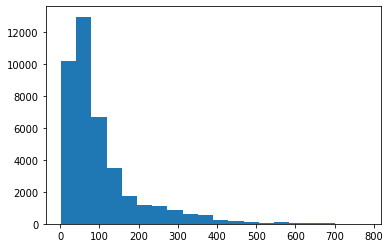

In [20]:
plt.hist(brief_summary_len, bins=20)

(array([1.990e+02, 1.500e+03, 6.190e+03, 5.464e+03, 6.076e+03, 8.641e+03,
        4.286e+03, 3.755e+03, 1.413e+03, 7.960e+02, 9.070e+02, 3.350e+02,
        2.860e+02, 1.400e+02, 8.300e+01, 7.100e+01, 3.300e+01, 2.000e+01,
        5.000e+00, 3.000e+00]),
 array([ 1. ,  3.4,  5.8,  8.2, 10.6, 13. , 15.4, 17.8, 20.2, 22.6, 25. ,
        27.4, 29.8, 32.2, 34.6, 37. , 39.4, 41.8, 44.2, 46.6, 49. ]),
 <a list of 20 Patch objects>)

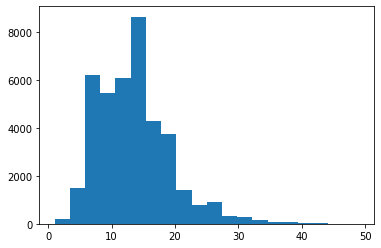

In [21]:
plt.hist(brief_title_len, bins=20)

In [9]:
len(df["brief_summary"].iloc[0].split())

228

In [6]:
df["topic"].nunique()

50

In [10]:
# This will be the new ID for 
df["topic_year"] = df["year"].astype(str) + "_" + df["topic"].astype(str)
df["topic_year"].iloc[:5]

0    2017_18
1    2017_27
2    2017_28
3    2017_30
4     2017_7
Name: topic_year, dtype: object

In [30]:
arr = ["a", "b", "c", "a"]
arr2 = ["a", 1, 2, 3]
arr3 = [1, 2, 3, "b"]
arr4 = [1, 2, 3, 4]

In [31]:
any([0 if type(x) is int else 1 for x in arr])

True

In [32]:
any([0 if type(x) is int else 1 for x in arr2])

True

In [33]:
any([0 if type(x) is int else 1 for x in arr3])

True

In [34]:
any([0 if type(x) is int else 1 for x in arr4])

False

In [35]:
type(3.61) is int

False

In [37]:
type(3.0) is float

True

In [ ]:
    707 
    708                 self.topics_eval_arr = topics_batch
--> 709                 self.doc_id_eval_arr = doc_ids_batch
    710             else:
    711                 self.preds_arr = np.append(

UnboundLocalError: local variable 'doc_ids_batch' referenced before assignment

In [32]:
x = ['Liposarcoma', 'MDM2 Amplification', '26-year-old male', 'None']

x_arr = [x] * 3
x_arr.append(["a", "b", "c", "d", "e"])
x_arr = pd.Series(x_arr)

In [33]:
x_arr.tolist()

[['Liposarcoma', 'MDM2 Amplification', '26-year-old male', 'None'],
 ['Liposarcoma', 'MDM2 Amplification', '26-year-old male', 'None'],
 ['Liposarcoma', 'MDM2 Amplification', '26-year-old male', 'None'],
 ['a', 'b', 'c', 'd', 'e']]